# 卒論研究３

## モジュールの読み込み

In [1]:
#
# 必要なモジュールの読み込み
#

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.svar_model import SVAR

from graphviz import Digraph

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定
plt.rcParams['font.size'] = 14 #フォントサイズ
import japanize_matplotlib
import datetime
import calendar
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import random

## 原系列

### データの加工

In [2]:
df_ = pd.read_csv('卒論データ3.csv')

In [3]:
df_.head(10)

,Date_TOPIX,TOPIX,Date_S&P500,S&P500,Date_SSEC,SSEC,Date_Policy,Policy,Date_Ex,Ex,Date_JGB,JGB
0,38077.0,1179.23,38077.0,1126.21,38077.0,1741.62,38077,93.16,38077.0,105.63,38077.0,1.434
1,38078.0,1175.01,38078.0,1132.17,38078.0,1758.15,38078,79.57,38078.0,104.07,38078.0,1.414
2,38079.0,1184.20,38079.0,1141.81,38079.0,1768.64,38079,46.53,38079.0,103.95,38079.0,1.424
3,38082.0,1199.24,38082.0,1150.57,38082.0,1766.48,38080,73.37,38082.0,104.46,38082.0,1.486
4,38083.0,1209.44,38083.0,1148.16,38083.0,1777.52,38081,70.58,38083.0,105.63,38083.0,1.518
5,38084.0,1204.81,38084.0,1140.53,38084.0,1774.55,38082,121.38,38084.0,106.00,38084.0,1.487
6,38085.0,1209.89,38085.0,1139.32,38085.0,1770.28,38083,71.35,38085.0,105.63,38085.0,1.487
7,38086.0,1190.86,38089.0,1145.20,38086.0,1727.35,38084,23.44,38086.0,106.58,38086.0,1.481
8,38089.0,1206.57,38090.0,1129.44,38089.0,1722.99,38085,43.58,38089.0,106.42,38089.0,1.522
9,38090.0,1216.60,38091.0,1128.17,38090.0,1715.14,38086,55.28,38090.0,105.25,38090.0,1.483


In [4]:
df_.tail(10)

,Date_TOPIX,TOPIX,Date_S&P500,S&P500,Date_SSEC,SSEC,Date_Policy,Policy,Date_Ex,Ex,Date_JGB,JGB
7174,NaN,NaN,NaN,NaN,NaN,NaN,45251,295.35,NaN,NaN,NaN,NaN
7175,NaN,NaN,NaN,NaN,NaN,NaN,45252,65.95,NaN,NaN,NaN,NaN
7176,NaN,NaN,NaN,NaN,NaN,NaN,45253,15.44,NaN,NaN,NaN,NaN
7177,NaN,NaN,NaN,NaN,NaN,NaN,45254,94.67,NaN,NaN,NaN,NaN
7178,NaN,NaN,NaN,NaN,NaN,NaN,45255,46.50,NaN,NaN,NaN,NaN
7179,NaN,NaN,NaN,NaN,NaN,NaN,45256,127.49,NaN,NaN,NaN,NaN
7180,NaN,NaN,NaN,NaN,NaN,NaN,45257,88.65,NaN,NaN,NaN,NaN
7181,NaN,NaN,NaN,NaN,NaN,NaN,45258,101.89,NaN,NaN,NaN,NaN
7182,NaN,NaN,NaN,NaN,NaN,NaN,45259,83.83,NaN,NaN,NaN,NaN
7183,NaN,NaN,NaN,NaN,NaN,NaN,45260,148.09,NaN,NaN,NaN,NaN


In [5]:
D = []
T = []
S = []
P = []
E = []
G = []

for d in range(38077,45261):
   
    cond1 = (d in df_['Date_TOPIX'].values)
    cond2 = (d in df_['Date_S&P500'].values)
    cond3 = (d in df_['Date_Policy'].values)
    cond4 = (d in df_['Date_Ex'].values)
    cond5 = (d in df_['Date_JGB'].values)
    
    if (cond1 & cond2 & cond3 & cond4 & cond5):
        D.append(d)
        cond_TOPIX = (df_['Date_TOPIX'] == d)
        t = df_.loc[cond_TOPIX,'TOPIX'].iloc[-1]
        T.append(t)
        cond_SP500 = (df_['Date_S&P500'] == d)
        s = df_.loc[cond_SP500,'S&P500'].iloc[-1]
        S.append(s)
        cond_Policy = (df_['Date_Policy'] == d)
        p = df_.loc[cond_Policy,'Policy'].iloc[-1]
        P.append(p)
        cond_Ex= (df_['Date_Ex'] == d)
        e = df_.loc[cond_Ex,'Ex'].iloc[-1]
        E.append(e)
        cond_JGB = (df_['Date_JGB'] == d)
        g = df_.loc[cond_JGB,'JGB'].iloc[-1]
        G.append(g)
    
    else:
        pass

df = pd.DataFrame({'Date':D, 'TOPIX':T, 'S&P500':S, 'Policy':P, 'Ex':E, 'JGB':G})
df

,Date,TOPIX,S&P500,Policy,Ex,JGB
0,38077,1179.23,1126.21,93.16,105.63,1.434
1,38078,1175.01,1132.17,79.57,104.07,1.414
2,38079,1184.20,1141.81,46.53,103.95,1.424
3,38082,1199.24,1150.57,121.38,104.46,1.486
4,38083,1209.44,1148.16,71.35,105.63,1.518
...,...,...,...,...,...,...
4652,45254,2390.94,4559.34,94.67,149.64,0.786
4653,45257,2381.76,4550.43,88.65,149.53,0.787
4654,45258,2376.71,4554.89,101.89,148.14,0.768
4655,45259,2364.50,4550.58,83.83,146.87,0.695


In [6]:
df.head(10)

,Date,TOPIX,S&P500,Policy,Ex,JGB
0,38077,1179.23,1126.21,93.16,105.63,1.434
1,38078,1175.01,1132.17,79.57,104.07,1.414
2,38079,1184.20,1141.81,46.53,103.95,1.424
3,38082,1199.24,1150.57,121.38,104.46,1.486
4,38083,1209.44,1148.16,71.35,105.63,1.518
5,38084,1204.81,1140.53,23.44,106.00,1.487
6,38085,1209.89,1139.32,43.58,105.63,1.487
7,38089,1206.57,1145.20,26.54,106.42,1.522
8,38090,1216.60,1129.44,76.02,105.25,1.483
9,38091,1217.87,1128.17,32.93,106.86,1.541


In [7]:
df.tail(10)

,Date,TOPIX,S&P500,Policy,Ex,JGB
4647,45246,2368.62,4508.24,149.23,151.34,0.798
4648,45247,2391.05,4514.02,168.58,150.77,0.765
4649,45250,2372.60,4547.38,42.89,149.95,0.756
4650,45251,2367.79,4538.19,295.35,148.19,0.712
4651,45252,2378.19,4556.62,65.95,148.30,0.742
4652,45254,2390.94,4559.34,94.67,149.64,0.786
4653,45257,2381.76,4550.43,88.65,149.53,0.787
4654,45258,2376.71,4554.89,101.89,148.14,0.768
4655,45259,2364.50,4550.58,83.83,146.87,0.695
4656,45260,2374.93,4567.80,148.09,147.09,0.691


In [8]:
df['Date'] = pd.to_timedelta(df['Date'],unit='D')+pd.to_datetime("1899/12/30")
df

,Date,TOPIX,S&P500,Policy,Ex,JGB
0,2004-03-31,1179.23,1126.21,93.16,105.63,1.434
1,2004-04-01,1175.01,1132.17,79.57,104.07,1.414
2,2004-04-02,1184.20,1141.81,46.53,103.95,1.424
3,2004-04-05,1199.24,1150.57,121.38,104.46,1.486
4,2004-04-06,1209.44,1148.16,71.35,105.63,1.518
...,...,...,...,...,...,...
4652,2023-11-24,2390.94,4559.34,94.67,149.64,0.786
4653,2023-11-27,2381.76,4550.43,88.65,149.53,0.787
4654,2023-11-28,2376.71,4554.89,101.89,148.14,0.768
4655,2023-11-29,2364.50,4550.58,83.83,146.87,0.695


In [9]:
df.set_index('Date', drop = True, inplace = True)
df

,TOPIX,S&P500,Policy,Ex,JGB
Date,,,,,
2004-03-31,1179.23,1126.21,93.16,105.63,1.434
2004-04-01,1175.01,1132.17,79.57,104.07,1.414
2004-04-02,1184.20,1141.81,46.53,103.95,1.424
2004-04-05,1199.24,1150.57,121.38,104.46,1.486
2004-04-06,1209.44,1148.16,71.35,105.63,1.518
...,...,...,...,...,...
2023-11-24,2390.94,4559.34,94.67,149.64,0.786
2023-11-27,2381.76,4550.43,88.65,149.53,0.787
2023-11-28,2376.71,4554.89,101.89,148.14,0.768


In [10]:
df = df.reindex(columns = ['TOPIX', 'S&P500', 'Ex', 'JGB', 'Policy'])
df

,TOPIX,S&P500,Ex,JGB,Policy
Date,,,,,
2004-03-31,1179.23,1126.21,105.63,1.434,93.16
2004-04-01,1175.01,1132.17,104.07,1.414,79.57
2004-04-02,1184.20,1141.81,103.95,1.424,46.53
2004-04-05,1199.24,1150.57,104.46,1.486,121.38
2004-04-06,1209.44,1148.16,105.63,1.518,71.35
...,...,...,...,...,...
2023-11-24,2390.94,4559.34,149.64,0.786,94.67
2023-11-27,2381.76,4550.43,149.53,0.787,88.65
2023-11-28,2376.71,4554.89,148.14,0.768,101.89


### 基本統計量

In [11]:
df.shape

(4657, 5)

In [12]:
df.describe()

,TOPIX,S&P500,Ex,JGB,Policy
count,4657.000000,4657.000000,4657.000000,4657.000000,4657.000000
mean,1405.744958,2140.020500,107.417846,0.736079,111.880260
std,402.294965,1076.784557,15.315623,0.637984,80.207641
min,695.510000,676.530000,75.760000,-0.297000,3.320000
25%,1116.340000,1274.540000,99.710000,0.079000,59.350000
50%,1459.490000,1830.610000,108.870000,0.642000,91.280000
75%,1694.790000,2792.810000,115.080000,1.342000,140.710000
max,2430.300000,4793.540000,151.770000,1.996000,738.020000


### 可視化

In [13]:
plt.rcParams['figure.figsize'] = [12, 9] 

In [14]:
def plot_1(df, title):
    
    fig = plt.figure()
    axes = fig.add_subplot()
    
    axes.plot(df, color = 'k')
    axes.set_title(title, size= 30)
    axes.axvline(datetime.datetime(2008,9,15), color="b")
    axes.axvline(datetime.datetime(2020,2,20), color="c")
    axes.axvline(datetime.datetime(2022,2,20), color="g")
    
    axes.text(0.2, 0.01, "リーマン", transform = axes.transAxes, color = 'b')
    axes.text(0.7, 0.01, "コロナ", transform = axes.transAxes, color = 'c')
    axes.text(0.9, 0.01, "ウクライナ", transform = axes.transAxes, color = 'g')

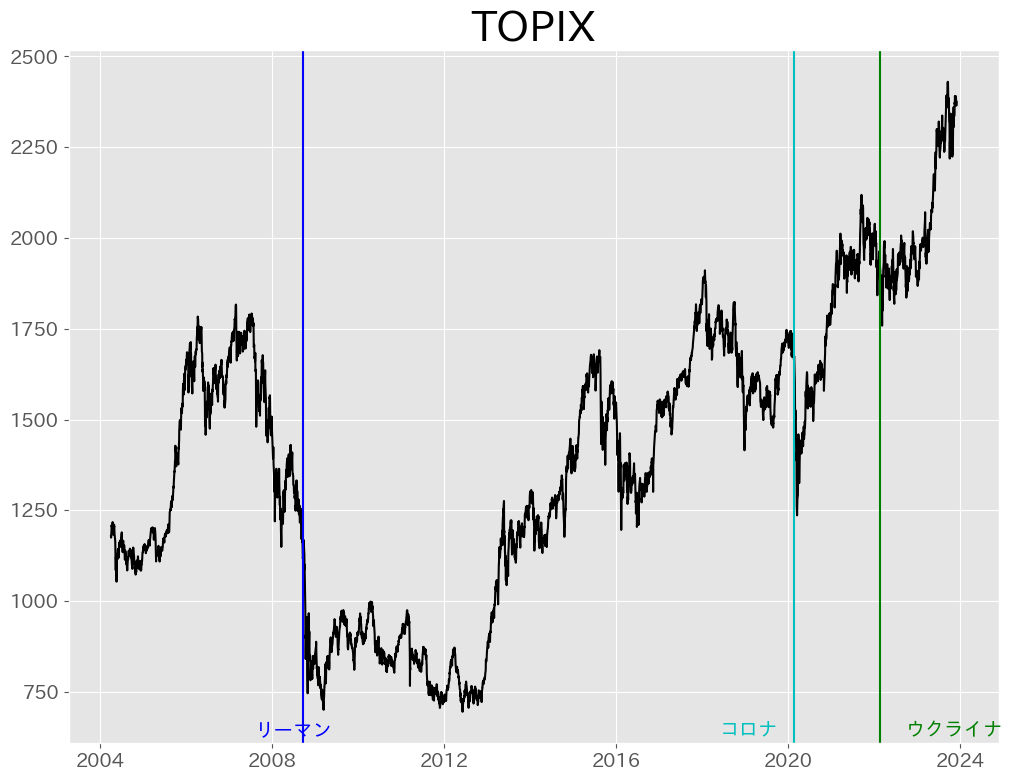

In [76]:
plot_1(df_TOPIX['TOPIX'],'TOPIX')

In [16]:
plt.rcParams['figure.figsize'] = [12, 4] 

In [17]:
def plot_2(df):
    
    """2列のdataframe型を読み込んで1×2のグラフにプロット"""
    
    fig, axes = plt.subplots(1, 2)
    
    for l in range(2):
        axes[l].plot(df.iloc[:,l], color = 'k')
        axes[l].set_title(df.columns.values[l])
        axes[l].axvline(datetime.datetime(2008,9,15), color="b")
        axes[l].axvline(datetime.datetime(2020,2,20), color="c")
        axes[l].axvline(datetime.datetime(2022,2,20), color="g")
        
    axes[0].text(0.2, 0.01, "リーマン", transform = axes[0].transAxes, color = 'b')
    axes[0].text(0.7, 0.01, "コロナ", transform = axes[0].transAxes, color = 'c')
    axes[0].text(0.8, 0.01, "ウクライナ", transform = axes[0].transAxes, color = 'g')

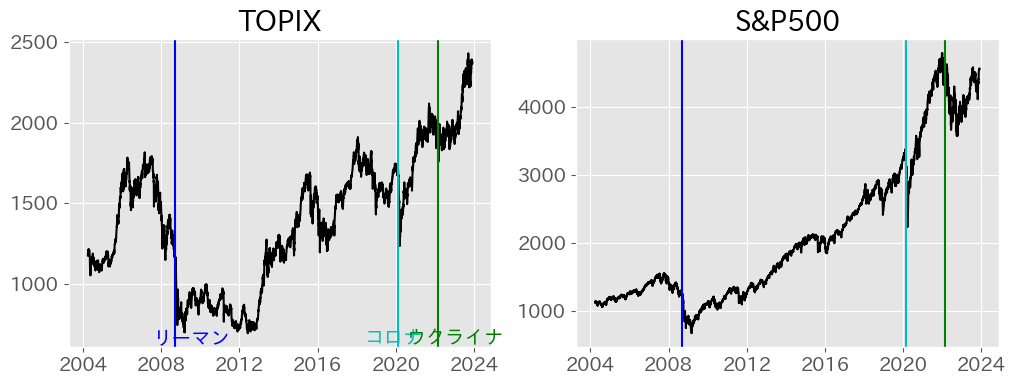

In [18]:
plot_2(df.iloc[:,0:2])

In [19]:
plt.rcParams['figure.figsize'] = [12, 9] 

In [20]:
def plot_4(df):
    
    """4列のdataframe型を読み込んで2×2のグラフにプロット"""
    
    fig, axes = plt.subplots(2, 2)
    
    t1 = (0, 0, 1, 1)
    t2 = (0, 1, 0, 1)
    
    for l, m, n in zip(t1, t2, range(4)):
        axes[l, m].plot(df.iloc[:,n], color = 'k')
        axes[l, m].set_title(df.columns.values[n])
        axes[l, m].axvline(datetime.datetime(2008,9,15), color="b")
        axes[l, m].axvline(datetime.datetime(2020,2,20), color="c")
        axes[l, m].axvline(datetime.datetime(2022,2,20), color="g")
        
    axes[0, 0].text(0.2, 0.01, "リーマン", transform = axes[0, 0].transAxes, color = 'b')
    axes[0, 0].text(0.7, 0.01, "コロナ", transform = axes[0, 0].transAxes, color = 'c')
    axes[0, 0].text(0.8, 0.01, "ウクライナ", transform = axes[0, 0].transAxes, color = 'g')

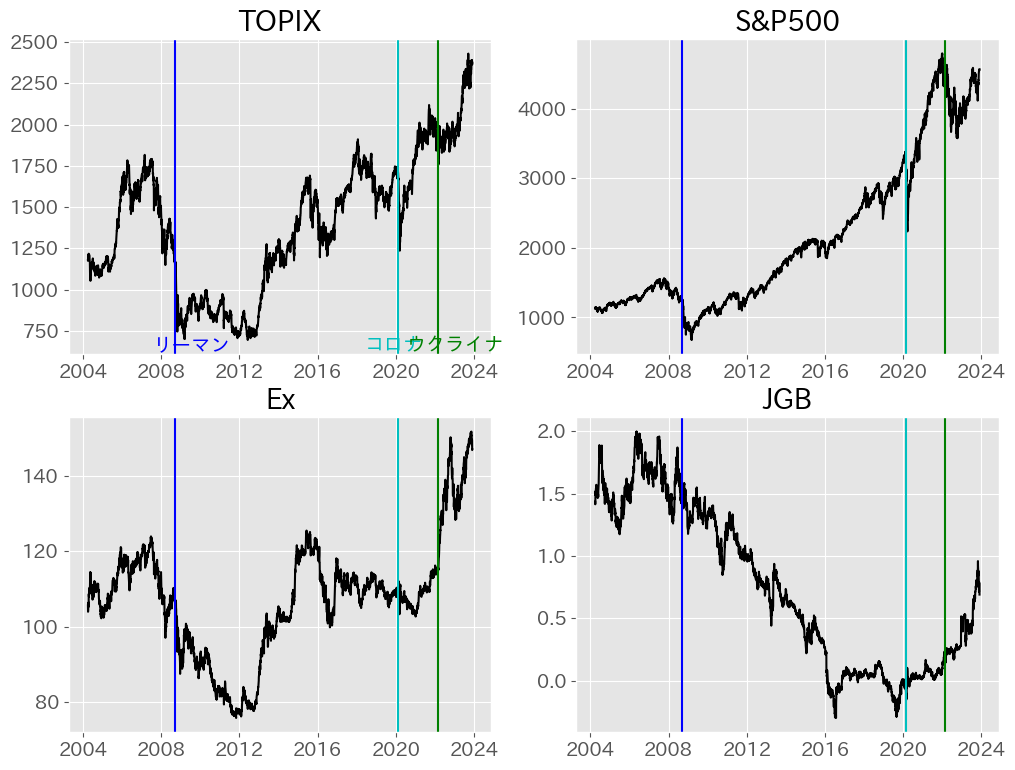

In [21]:
plot_4(df.iloc[:,0:4])

In [22]:
#df_scatter = sns.pairplot(df) # 散布図行列

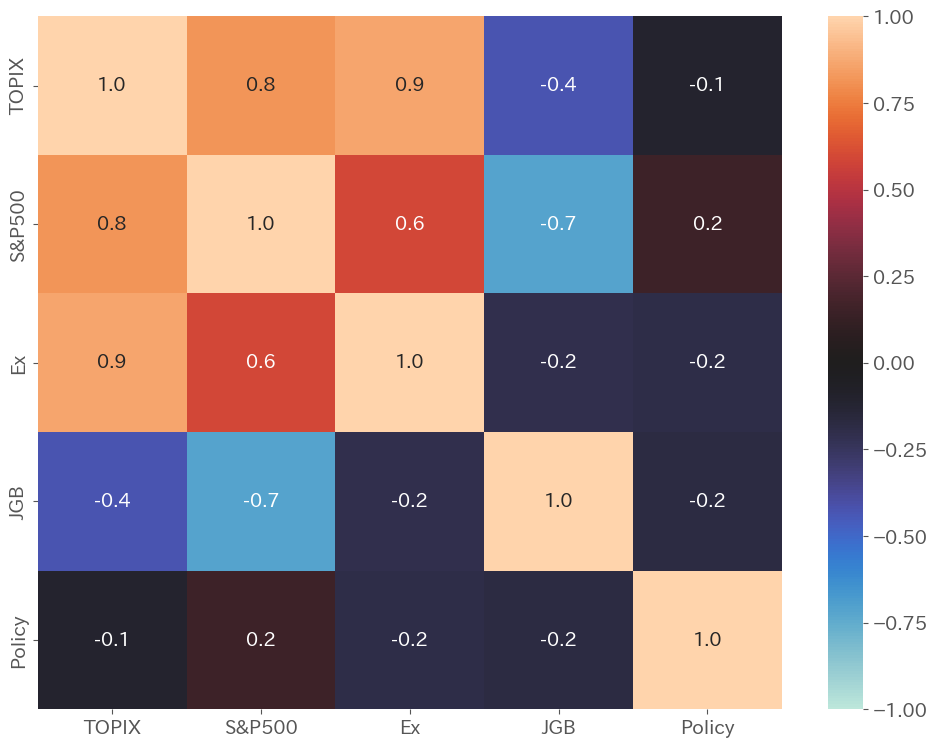

In [23]:
corr_mat = df.corr(method='pearson')
# method='spearman'でスピアマン、'kendall'でケンドールも指定可能
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

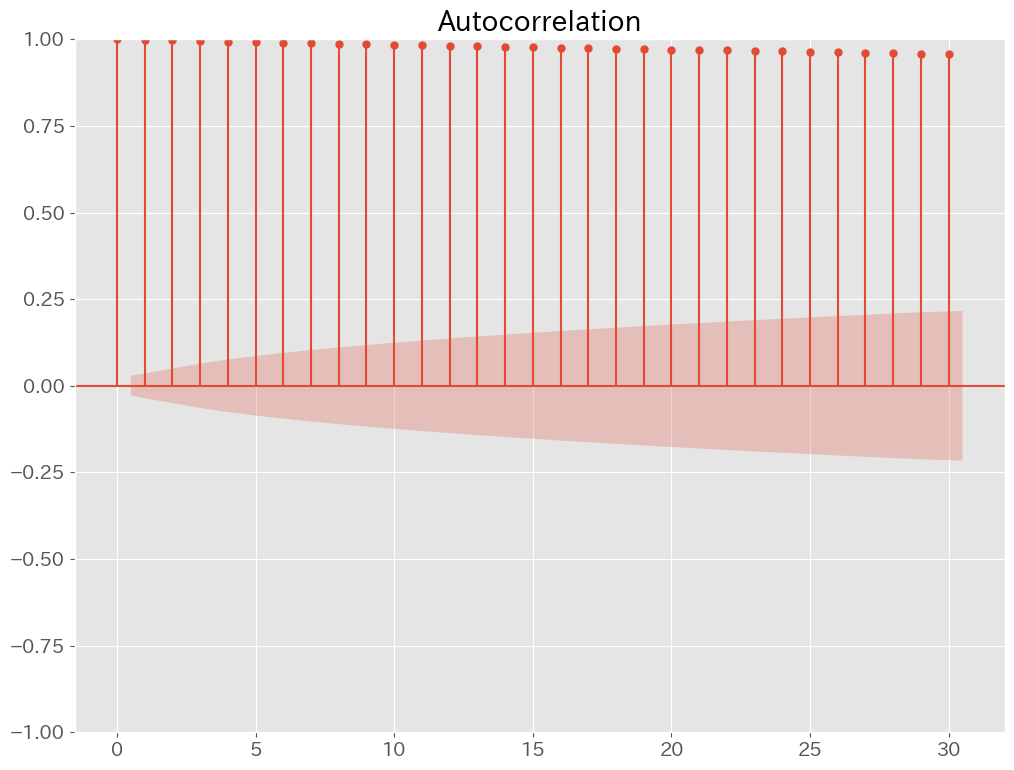

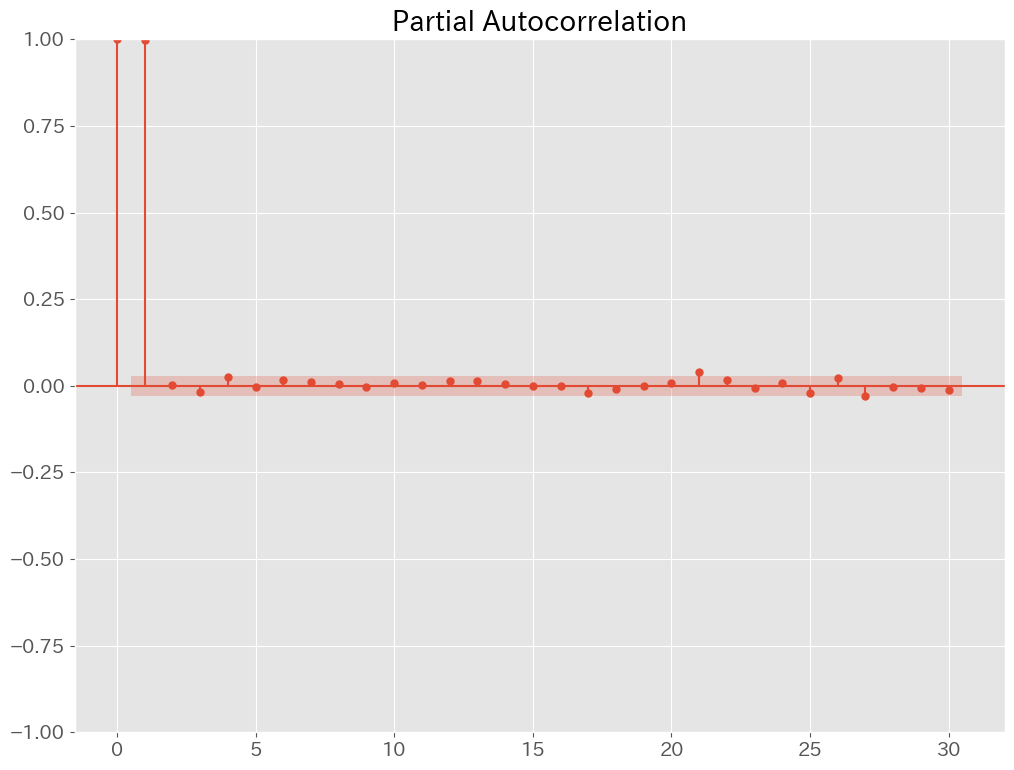

In [24]:
#
# 原系列の自己相関
#

acf = plot_acf(df['TOPIX'], lags=30)   #自己相関
pacf = plot_pacf(df['TOPIX'], lags=30) #偏自己相関

## 定常系列へと処理

### 単位根検定

In [25]:
#
# Augmented Dickey-Fuller 単位根検定
#   帰無仮説：単位根がある
#   対立仮説：定数項＋定常過程
#

def ADF_c(df):
    
    for i in range(len(df.columns)):

        #Augmented Dickey-Fuller 単位根検定
        c_results = adfuller(df.iloc[:,i],regression='c')  

        #p値出力
        print(df.columns[i],'\t',c_results[1]) 

In [26]:
#
# Augmented Dickey-Fuller 単位根検定
#   帰無仮説：単位根がある
#   対立仮説：定数項 ＋ 線形トレンド ＋ 定常過程
#

def ADF_ct(df):

    for i in range(len(df.columns)):
    
        #Augmented Dickey-Fuller 単位根検定
        c_results = adfuller(df.iloc[:,i],regression='ct')  
    
        #p値出力
        print(df.columns[i],'\t',c_results[1]) 

In [27]:
#
# Augmented Dickey-Fuller 単位根検定
#   帰無仮説：単位根がある
#   対立仮説：定数項 ＋ 線形トレンド ＋ 非線形トレンド ＋ 定常過程
#

def ADF_ctt(df):

    for i in range(len(df.columns)):
    
        #Augmented Dickey-Fuller 単位根検定
        c_results = adfuller(df.iloc[:,i],regression='ctt')  
    
        #p値出力
        print(df.columns[i],'\t',c_results[1]) 

In [28]:
df

,TOPIX,S&P500,Ex,JGB,Policy
Date,,,,,
2004-03-31,1179.23,1126.21,105.63,1.434,93.16
2004-04-01,1175.01,1132.17,104.07,1.414,79.57
2004-04-02,1184.20,1141.81,103.95,1.424,46.53
2004-04-05,1199.24,1150.57,104.46,1.486,121.38
2004-04-06,1209.44,1148.16,105.63,1.518,71.35
...,...,...,...,...,...
2023-11-24,2390.94,4559.34,149.64,0.786,94.67
2023-11-27,2381.76,4550.43,149.53,0.787,88.65
2023-11-28,2376.71,4554.89,148.14,0.768,101.89


In [29]:
df_log = np.log(df[['TOPIX','S&P500','Ex']])
df_log

,TOPIX,S&P500,Ex
Date,,,
2004-03-31,7.072617,7.026613,4.659942
2004-04-01,7.069032,7.031891,4.645064
2004-04-02,7.076823,7.040370,4.643910
2004-04-05,7.089443,7.048013,4.648804
2004-04-06,7.097913,7.045916,4.659942
...,...,...,...
2023-11-24,7.779442,8.424933,5.008232
2023-11-27,7.775595,8.422977,5.007497
2023-11-28,7.773472,8.423957,4.998158


In [30]:
df_original = pd.merge(df_log, df.iloc[:,-2:], how = 'inner', on = 'Date')
df_original

,TOPIX,S&P500,Ex,JGB,Policy
Date,,,,,
2004-03-31,7.072617,7.026613,4.659942,1.434,93.16
2004-04-01,7.069032,7.031891,4.645064,1.414,79.57
2004-04-02,7.076823,7.040370,4.643910,1.424,46.53
2004-04-05,7.089443,7.048013,4.648804,1.486,121.38
2004-04-06,7.097913,7.045916,4.659942,1.518,71.35
...,...,...,...,...,...
2023-11-24,7.779442,8.424933,5.008232,0.786,94.67
2023-11-27,7.775595,8.422977,5.007497,0.787,88.65
2023-11-28,7.773472,8.423957,4.998158,0.768,101.89


In [31]:
ADF_c(df_original)

TOPIX 	 0.7987452086264011
S&P500 	 0.9569718393272355
Ex 	 0.888682837521635
JGB 	 0.56699132364815
Policy 	 5.15381482451015e-07


In [32]:
ADF_ct(df_original)

TOPIX 	 0.7706070733982147
S&P500 	 0.5001601431886888
Ex 	 0.934231079142934
JGB 	 0.8821047120265435
Policy 	 1.9597346786320453e-06


In [33]:
ADF_ctt(df_original)

TOPIX 	 0.7282517544785188
S&P500 	 0.5146516070048851
Ex 	 0.7921747561841495
JGB 	 0.5588826898976773
Policy 	 1.1356162160035582e-05


### 変換

In [34]:
df_diff = df_original[['TOPIX','S&P500','Ex','JGB']].diff().dropna()
df_diff

,TOPIX,S&P500,Ex,JGB
Date,,,,
2004-04-01,-0.003585,0.005278,-0.014879,-0.020
2004-04-02,0.007791,0.008479,-0.001154,0.010
2004-04-05,0.012621,0.007643,0.004894,0.062
2004-04-06,0.008469,-0.002097,0.011138,0.032
2004-04-07,-0.003836,-0.006668,0.003497,-0.031
...,...,...,...,...
2023-11-24,0.005347,0.000597,0.008995,0.044
2023-11-27,-0.003847,-0.001956,-0.000735,0.001
2023-11-28,-0.002123,0.000980,-0.009339,-0.019


In [35]:
df_changed = pd.merge(df_diff, df_original.loc['2004-04-01':, ['Policy']], how = 'inner', on = 'Date')
df_changed#.to_csv("df_changed.csv")

,TOPIX,S&P500,Ex,JGB,Policy
Date,,,,,
2004-04-01,-0.003585,0.005278,-0.014879,-0.020,79.57
2004-04-02,0.007791,0.008479,-0.001154,0.010,46.53
2004-04-05,0.012621,0.007643,0.004894,0.062,121.38
2004-04-06,0.008469,-0.002097,0.011138,0.032,71.35
2004-04-07,-0.003836,-0.006668,0.003497,-0.031,23.44
...,...,...,...,...,...
2023-11-24,0.005347,0.000597,0.008995,0.044,94.67
2023-11-27,-0.003847,-0.001956,-0.000735,0.001,88.65
2023-11-28,-0.002123,0.000980,-0.009339,-0.019,101.89


In [36]:
ADF_c(df_changed)

TOPIX 	 0.0
S&P500 	 8.90113576784521e-30
Ex 	 0.0
JGB 	 0.0
Policy 	 5.180137208129009e-07


In [37]:
ADF_ct(df_changed)

TOPIX 	 0.0
S&P500 	 0.0
Ex 	 0.0
JGB 	 0.0
Policy 	 1.9674851111933773e-06


In [38]:
ADF_ctt(df_changed)

TOPIX 	 0.0
S&P500 	 7.224436119868984e-25
Ex 	 0.0
JGB 	 0.0
Policy 	 1.1398572027778772e-05


### 基本統計量

In [39]:
df_changed.describe()#.to_csv("基本統計量(df_changed).csv")

,TOPIX,S&P500,Ex,JGB,Policy
count,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000
mean,0.000150,0.000301,0.000071,-0.000160,111.884280
std,0.013389,0.012440,0.006420,0.021053,80.215786
min,-0.100071,-0.127652,-0.048316,-0.125000,3.320000
25%,-0.006532,-0.004198,-0.003295,-0.010000,59.350000
50%,0.000483,0.000734,0.000184,0.000000,91.265000
75%,0.007250,0.005796,0.003482,0.010000,140.725000
max,0.128646,0.104236,0.048428,0.150000,738.020000


In [40]:
plt.rcParams['figure.figsize'] = [12, 9]

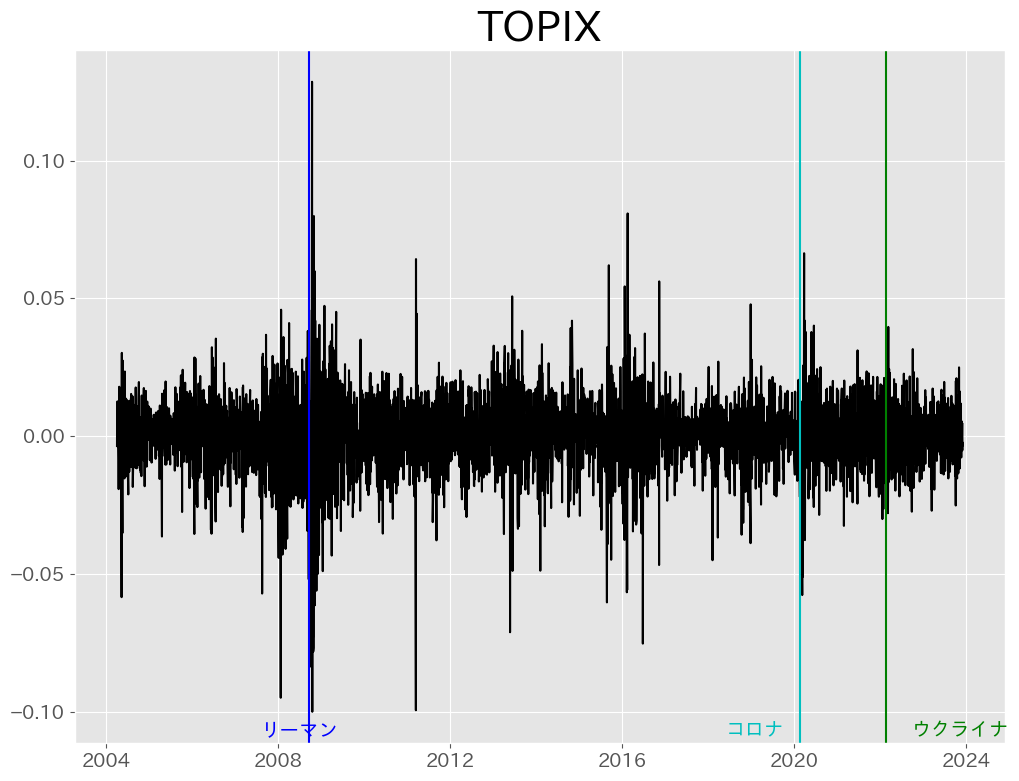

In [41]:
plot_1(df_changed['TOPIX'],'TOPIX')

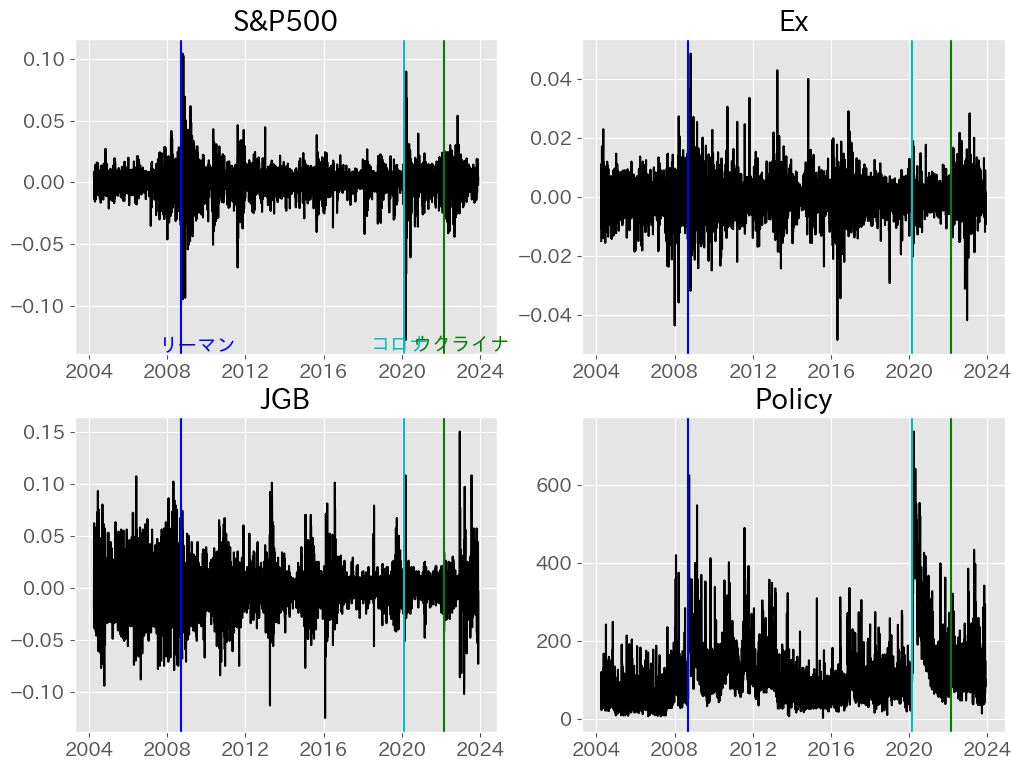

In [42]:
plot_4(df_changed.iloc[:,1:5])

In [43]:
#df_scatter = sns.pairplot(df_changed) # 散布図行列

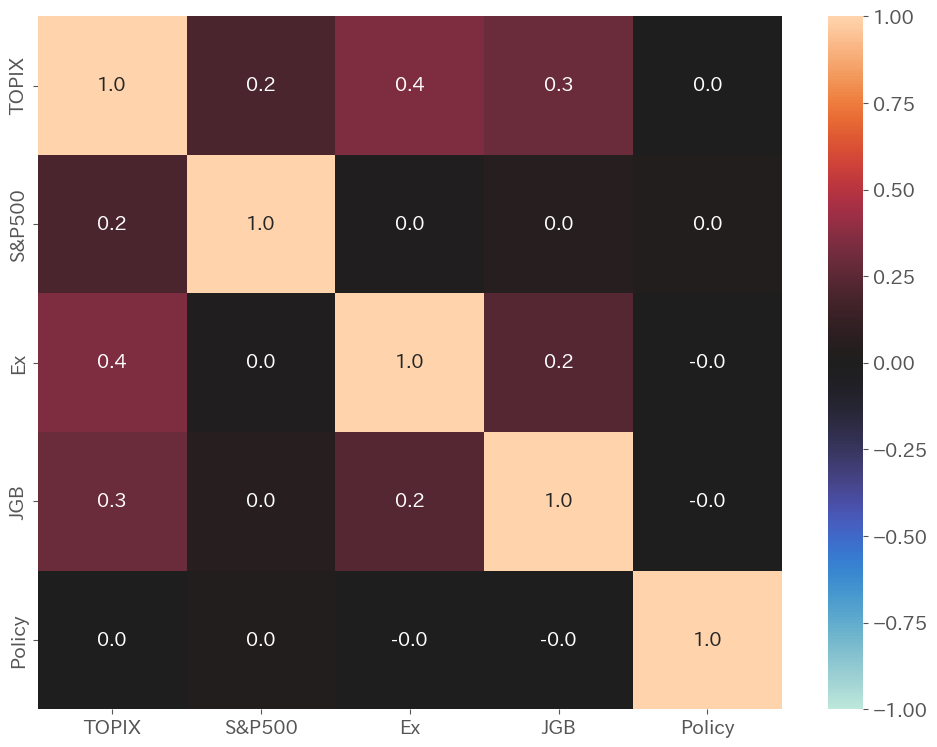

In [44]:
corr_mat = df_changed.corr(method='pearson')
# method='spearman'でスピアマン、'kendall'でケンドールも指定可能
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

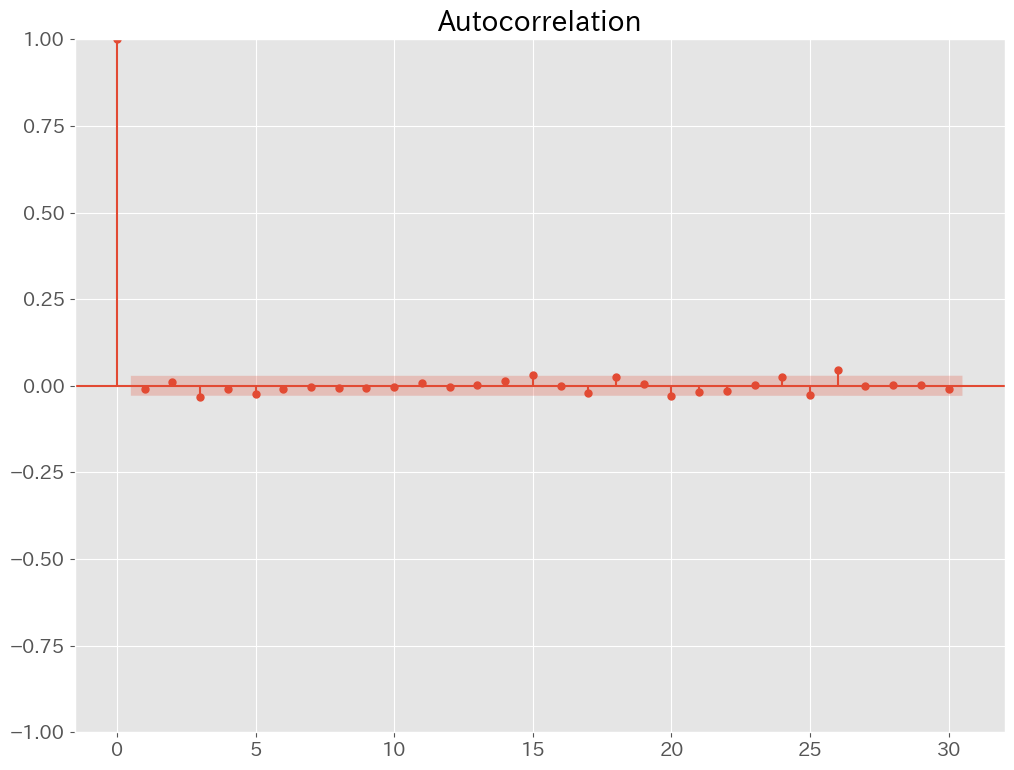

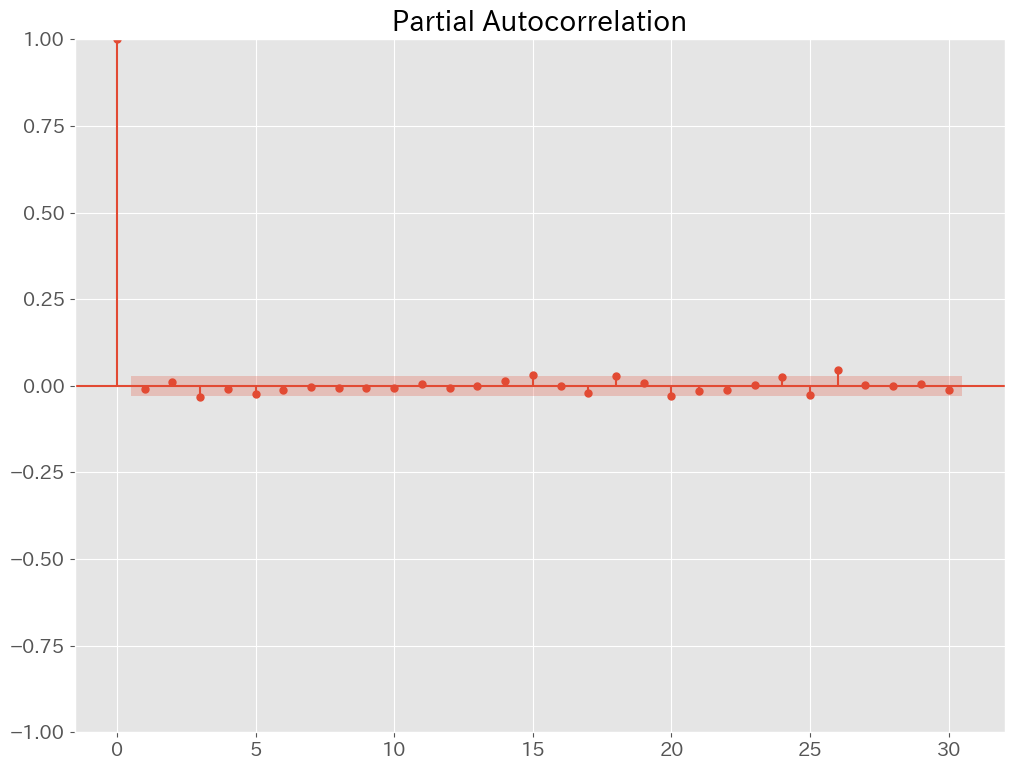

In [45]:
#
#定常系列の自己相関
#

acf = plot_acf(df_changed['TOPIX'], lags=30)   #自己相関
pacf = plot_pacf(df_changed['TOPIX'], lags=30) #偏自己相関

### 変数の選択・順番

In [46]:
df_changed = df_changed.reindex(columns = [ 'S&P500', 'Policy', 'Ex', 'JGB','TOPIX',])
df_changed

,S&P500,Policy,Ex,JGB,TOPIX
Date,,,,,
2004-04-01,0.005278,79.57,-0.014879,-0.020,-0.003585
2004-04-02,0.008479,46.53,-0.001154,0.010,0.007791
2004-04-05,0.007643,121.38,0.004894,0.062,0.012621
2004-04-06,-0.002097,71.35,0.011138,0.032,0.008469
2004-04-07,-0.006668,23.44,0.003497,-0.031,-0.003836
...,...,...,...,...,...
2023-11-24,0.000597,94.67,0.008995,0.044,0.005347
2023-11-27,-0.001956,88.65,-0.000735,0.001,-0.003847
2023-11-28,0.000980,101.89,-0.009339,-0.019,-0.002123


In [47]:
df_changed.isna().sum()

S&P500    0
Policy    0
Ex        0
JGB       0
TOPIX     0
dtype: int64

## 分析モデル

### VARモデル

In [48]:
#
# VARモデルの構築
#

    
# 最大のラグ数
maxlags = 10

# モデルのインスタンス生成
var_model = VAR(df_changed)

#最適なハイパーパラメータ（ラグの次数）の探索
#print(var_model.select_order(20).summary())

# 最適なラグの探索
lag = var_model.select_order(maxlags).selected_orders
print('最適なラグ：',lag['bic'],'\n')

# モデルの学習
results_VAR = var_model.fit(lag['bic'])

# 結果出力
print(results_VAR.summary())

最適なラグ： 4 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 03, Jan, 2024
Time:                     23:14:51
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -27.9078
Nobs:                     4652.00    HQIC:                  -28.0021
Log likelihood:           32352.5    FPE:                6.55541e-13
AIC:                     -28.0533    Det(Omega_mle):     6.40943e-13
--------------------------------------------------------------------
Results for equation S&P500
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.000103         0.000339           -0.303           0.762
L1.S&P500        -0.124392         0.015368           -8.094           0.000
L1.Policy         0.000000         0.000004            0.104    

In [49]:
#
# グレンジャー因果性の検定
#   帰無仮説：グレンジャー因果なし
#   対立仮説：グレンジャー因果あり
#

for i in range(len(df_changed.columns)):
    for j in range(len(df_changed.columns)):
        if i != j :
            #因果の検定
            test_c_VAR = results_VAR.test_causality(causing=i, caused=j) 
            #p値
            test_c_VAR.pvalue
            #検定結果の出力
            print(df_changed.columns[i],'->',df_changed.columns[j],'\t',test_c_VAR.pvalue)

S&P500 -> Policy 	 3.635674721992366e-05
S&P500 -> Ex 	 8.013935664124032e-66
S&P500 -> JGB 	 1.0695092799103751e-17
S&P500 -> TOPIX 	 1.0845648936985968e-272
Policy -> S&P500 	 0.0010319594950726583
Policy -> Ex 	 0.8330144219307709
Policy -> JGB 	 0.8044271507644183
Policy -> TOPIX 	 0.16773417234600801
Ex -> S&P500 	 0.01921761974265954
Ex -> Policy 	 0.37610148378406694
Ex -> JGB 	 0.48359302544934135
Ex -> TOPIX 	 0.0001242392946779417
JGB -> S&P500 	 0.25797711858871586
JGB -> Policy 	 0.1545629880092976
JGB -> Ex 	 0.12056553320634397
JGB -> TOPIX 	 0.3338106984274806
TOPIX -> S&P500 	 0.4989678246425544
TOPIX -> Policy 	 0.6035815940509239
TOPIX -> Ex 	 3.7586956471118517e-17
TOPIX -> JGB 	 6.948950465713211e-07


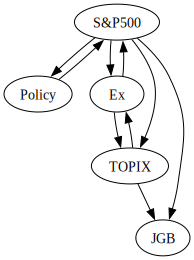

In [50]:
#
# 有向グラフ（VARのみ考慮）
#
    
# インスタンスの生成
graph1 = Digraph()

# グラフにノードを追加
for i in range(len(df_changed.columns)):
    graph1.node(df_changed.columns[i])

# 因果を検定し有意なとき線を引く
for i in range(len(df_changed.columns)):
    for j in range(len(df_changed.columns)):
        if i != j :
            #因果の検定
            test_c_VAR = results_VAR.test_causality(causing=i, caused=j) 
            #p値が0.1未満のとき線を追加
            if test_c_VAR.pvalue < 0.05:
                graph1.edge(df_changed.columns[i], df_changed.columns[j])

# 有向グラフを表示
graph1

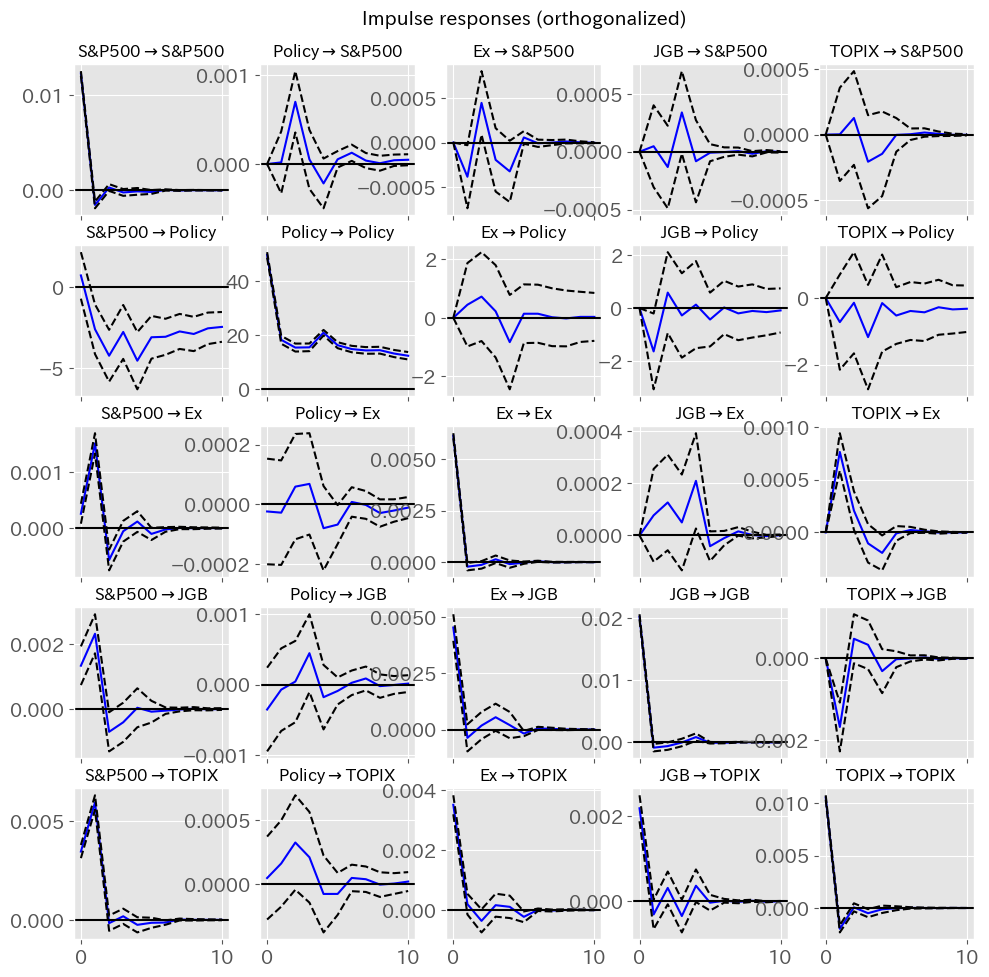

In [51]:
#インパルス応答関数
    
irf = results_VAR.irf()
irf.plot(orth=True)
plt.show()

In [52]:
fevd = results_VAR.fevd(11)
fevd.summary()

FEVD for S&P500
        S&P500    Policy        Ex       JGB     TOPIX
0     1.000000  0.000000  0.000000  0.000000  0.000000
1     0.999022  0.000002  0.000961  0.000015  0.000000
2     0.994385  0.003150  0.002235  0.000127  0.000103
3     0.993111  0.003163  0.002476  0.000874  0.000376
4     0.991958  0.003461  0.003152  0.000917  0.000512
5     0.991921  0.003479  0.003172  0.000917  0.000512
6     0.991817  0.003582  0.003172  0.000917  0.000512
7     0.991805  0.003592  0.003172  0.000917  0.000514
8     0.991802  0.003593  0.003173  0.000919  0.000514
9     0.991790  0.003605  0.003173  0.000919  0.000514
10    0.991775  0.003620  0.003173  0.000919  0.000514

FEVD for Policy
        S&P500    Policy        Ex       JGB     TOPIX
0     0.000202  0.999798  0.000000  0.000000  0.000000
1     0.002577  0.996214  0.000071  0.000951  0.000186
2     0.008168  0.990434  0.000238  0.000983  0.000177
3     0.009852  0.988401  0.000235  0.000932  0.000579
4     0.014081  0.984190  0.0003

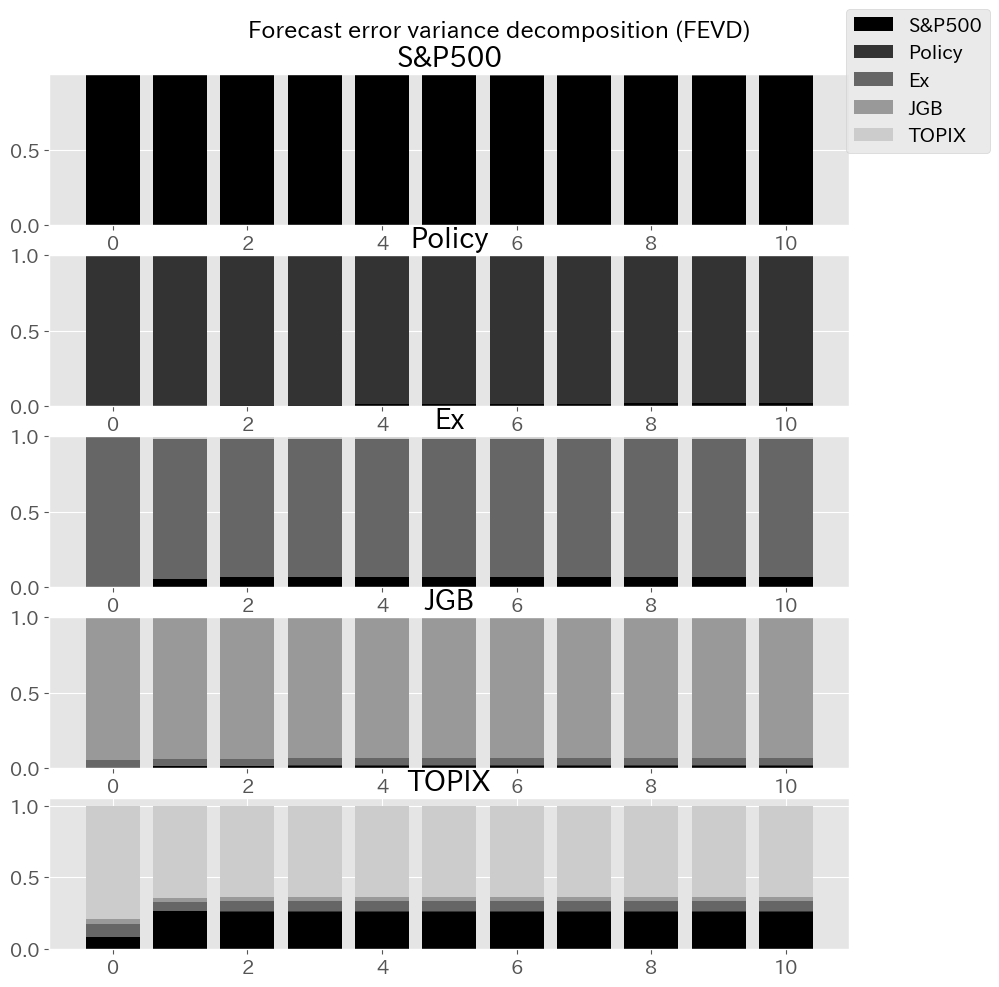

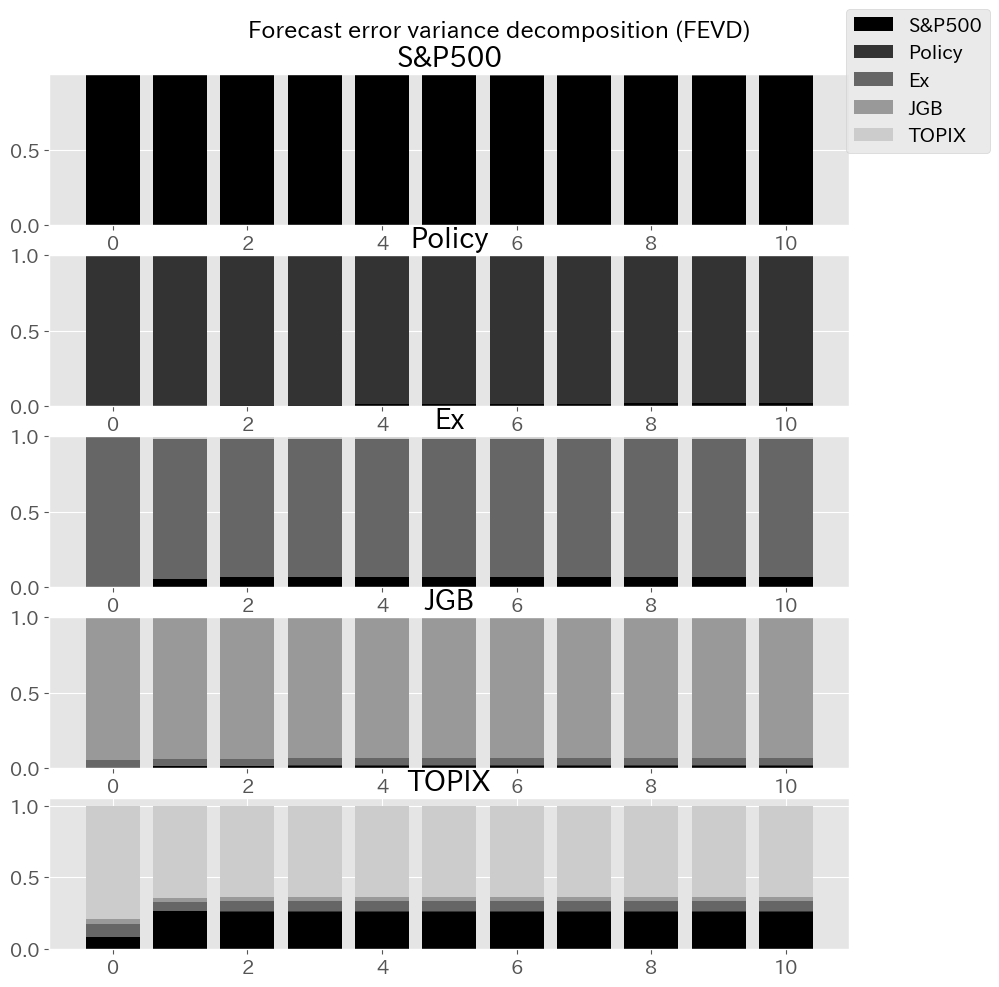

In [53]:
fevd.plot()

In [54]:
df1 = df_changed.loc['2007-01-01':'2010-12-31',:]
df1

,S&P500,Policy,Ex,JGB,TOPIX
Date,,,,,
2007-01-04,0.000028,68.55,0.002599,0.038,0.010580
2007-01-05,-0.006103,67.45,-0.006131,-0.004,-0.014000
2007-01-09,0.001701,63.25,0.001010,0.020,0.009972
2007-01-10,0.001938,56.43,0.005121,0.020,-0.017359
2007-01-11,0.006320,38.77,0.002008,-0.019,-0.003783
...,...,...,...,...,...
2010-12-22,0.003374,129.36,0.001074,-0.034,-0.000475
2010-12-27,-0.001033,167.35,-0.010312,0.022,-0.001215
2010-12-28,0.000771,134.15,-0.003018,-0.028,-0.002047


In [55]:
#
# VARモデルの構築
#

    
# 最大のラグ数
maxlags = 10

# モデルのインスタンス生成
GFC = VAR(df1)

#最適なハイパーパラメータ（ラグの次数）の探索
#print(var_model.select_order(5).summary())

# 最適なラグの探索
#lag = var_model.select_order(maxlags).selected_orders
print('最適なラグ：',lag['bic'],'\n')

# モデルの学習
results_GFC = GFC.fit(lag['bic'])

# 結果出力
print(results_VAR.summary())

最適なラグ： 4 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 03, Jan, 2024
Time:                     23:14:59
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -27.9078
Nobs:                     4652.00    HQIC:                  -28.0021
Log likelihood:           32352.5    FPE:                6.55541e-13
AIC:                     -28.0533    Det(Omega_mle):     6.40943e-13
--------------------------------------------------------------------
Results for equation S&P500
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.000103         0.000339           -0.303           0.762
L1.S&P500        -0.124392         0.015368           -8.094           0.000
L1.Policy         0.000000         0.000004            0.104    

In [56]:
#
# グレンジャー因果性の検定
#   帰無仮説：グレンジャー因果なし
#   対立仮説：グレンジャー因果あり
#

for i in range(len(df1.columns)):
    for j in range(len(df1.columns)):
        if i != j :
            #因果の検定
            test_c_GFC = results_GFC.test_causality(causing=i, caused=j) 
            #p値
            test_c_GFC.pvalue
            #検定結果の出力
            print(df1.columns[i],'->',df1.columns[j],'\t',test_c_GFC.pvalue)

S&P500 -> Policy 	 0.0002925145211984081
S&P500 -> Ex 	 1.1683620289409127e-52
S&P500 -> JGB 	 1.6748126631391888e-12
S&P500 -> TOPIX 	 4.768826243524791e-89
Policy -> S&P500 	 0.0005957519567546404
Policy -> Ex 	 0.507732458892726
Policy -> JGB 	 0.5137086472453225
Policy -> TOPIX 	 0.44685256285726893
Ex -> S&P500 	 0.030286654916637106
Ex -> Policy 	 0.35223275039726726
Ex -> JGB 	 0.5899084268046473
Ex -> TOPIX 	 8.057976465103947e-05
JGB -> S&P500 	 0.043383918089749236
JGB -> Policy 	 0.00912938092703481
JGB -> Ex 	 0.210315386790859
JGB -> TOPIX 	 0.14990558201407425
TOPIX -> S&P500 	 0.43074083250514195
TOPIX -> Policy 	 0.8516427516297292
TOPIX -> Ex 	 0.2881612697957307
TOPIX -> JGB 	 0.00027275762399473706


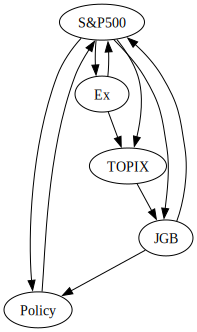

In [57]:
#
# 有向グラフ（VARのみ考慮）
#
    
# インスタンスの生成
graph2 = Digraph()

# グラフにノードを追加
for i in range(len(df1.columns)):
    graph2.node(df1.columns[i])

# 因果を検定し有意なとき線を引く
for i in range(len(df1.columns)):
    for j in range(len(df1.columns)):
        if i != j :
            #因果の検定
            test_c_GFC = results_GFC.test_causality(causing=i, caused=j) 
            #p値が0.1未満のとき線を追加
            if test_c_GFC.pvalue < 0.05:
                graph2.edge(df1.columns[i], df1.columns[j])

# 有向グラフを表示
graph2

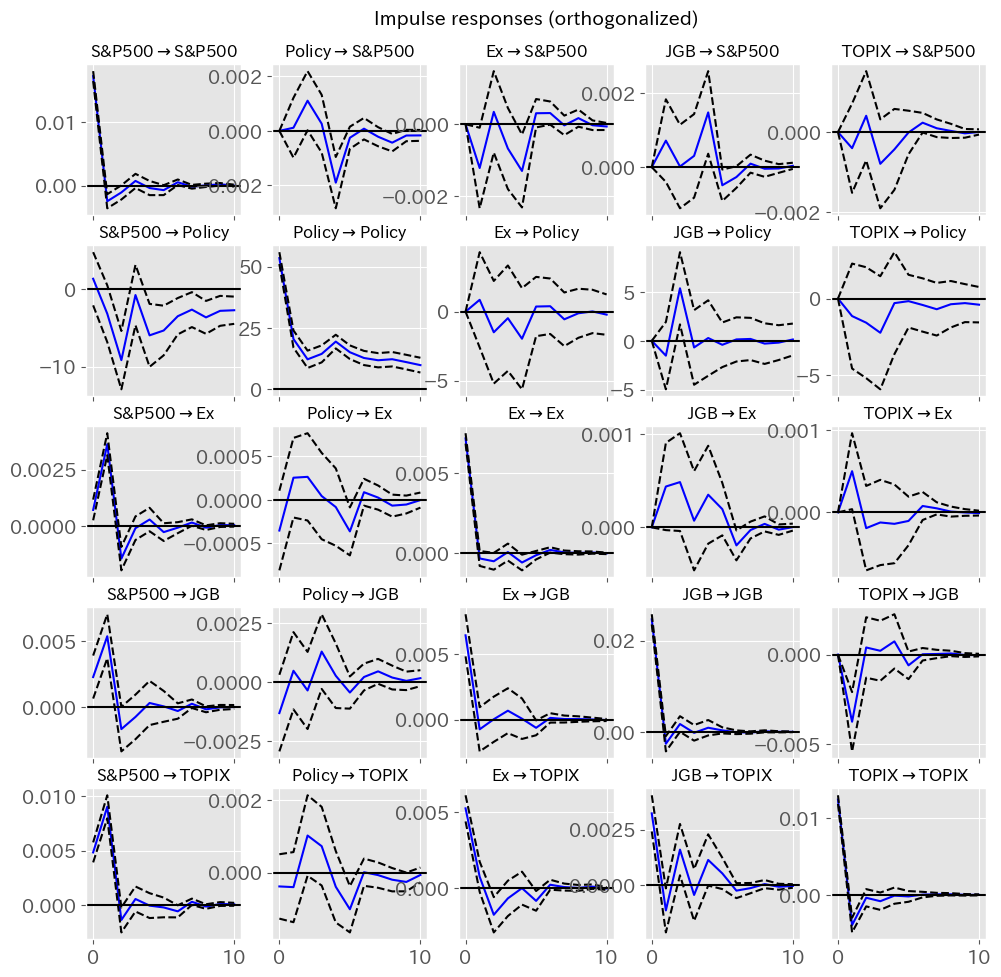

In [58]:
#インパルス応答関数
    
irf_GFC = results_GFC.irf()
irf_GFC.plot(orth=True)
plt.show()

In [59]:
fevd_GFC = results_GFC.fevd(11)
fevd_GFC.summary()

FEVD for S&P500
        S&P500    Policy        Ex       JGB     TOPIX
0     1.000000  0.000000  0.000000  0.000000  0.000000
1     0.992949  0.000043  0.004805  0.001682  0.000521
2     0.988148  0.003986  0.005149  0.001669  0.001049
3     0.984242  0.004184  0.006575  0.001960  0.003039
4     0.960677  0.015321  0.011682  0.008779  0.003543
5     0.959548  0.015476  0.011943  0.009499  0.003533
6     0.958902  0.015471  0.012225  0.009705  0.003698
7     0.958710  0.015609  0.012225  0.009730  0.003725
8     0.958061  0.016178  0.012306  0.009729  0.003726
9     0.957974  0.016263  0.012305  0.009730  0.003727
10    0.957877  0.016347  0.012316  0.009733  0.003727

FEVD for Policy
        S&P500    Policy        Ex       JGB     TOPIX
0     0.000605  0.999395  0.000000  0.000000  0.000000
1     0.003578  0.995100  0.000224  0.000701  0.000396
2     0.026776  0.962520  0.000836  0.008805  0.001064
3     0.025413  0.962987  0.000848  0.008427  0.002326
4     0.031342  0.957252  0.0016

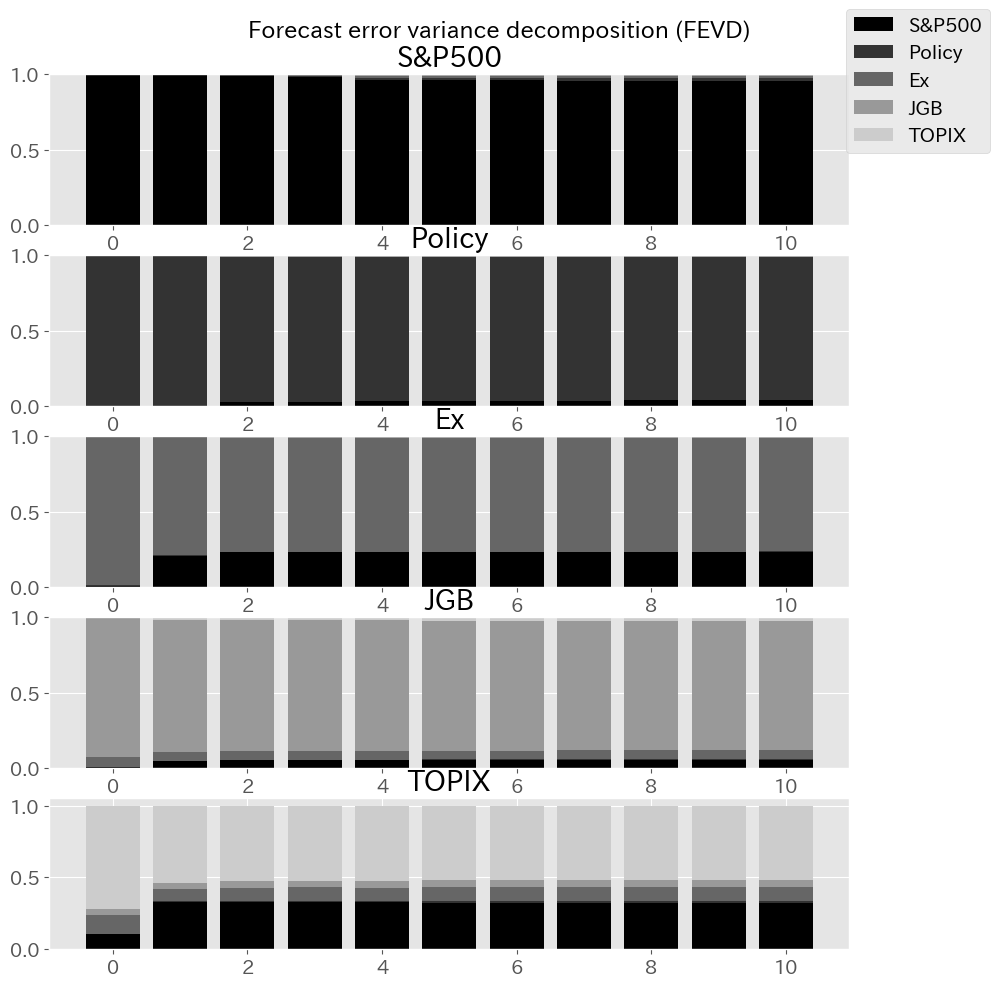

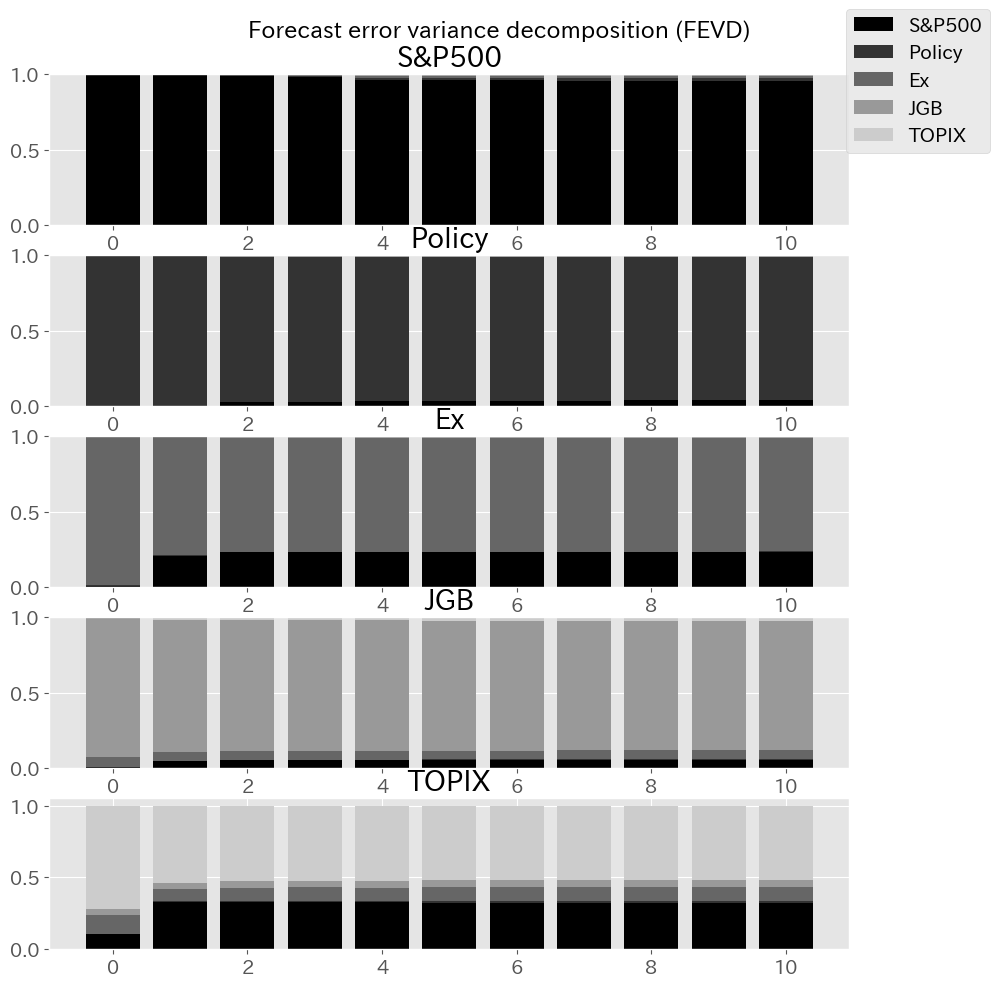

In [60]:
fevd_GFC.plot()

In [61]:
df2 = df_changed.loc['2020-01-01':,:]
df2

,S&P500,Policy,Ex,JGB,TOPIX
Date,,,,,
2020-01-06,0.007728,147.96,-0.013139,-0.010,-0.013964
2020-01-07,-0.002807,103.98,0.003048,0.017,0.016105
2020-01-08,0.004890,91.15,-0.005548,-0.005,-0.013805
2020-01-09,0.006633,71.92,0.012897,0.010,0.016121
2020-01-10,-0.002859,74.58,0.002742,0.000,0.003528
...,...,...,...,...,...
2023-11-24,0.000597,94.67,0.008995,0.044,0.005347
2023-11-27,-0.001956,88.65,-0.000735,0.001,-0.003847
2023-11-28,0.000980,101.89,-0.009339,-0.019,-0.002123


In [62]:
#
# VARモデルの構築
#

    
# 最大のラグ数
maxlags = 10

# モデルのインスタンス生成
var_COVID = VAR(df2)

#最適なハイパーパラメータ（ラグの次数）の探索
#print(var_model.select_order(5).summary())

# 最適なラグの探索
lag = var_model.select_order(maxlags).selected_orders
print('最適なラグ：',lag['bic'],'\n')

# モデルの学習
results_COVID = var_COVID.fit(lag['bic'])

# 結果出力
print(results_COVID.summary())

最適なラグ： 4 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 03, Jan, 2024
Time:                     23:15:05
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -27.3259
Nobs:                     921.000    HQIC:                  -27.6661
Log likelihood:           6407.68    FPE:                7.82764e-13
AIC:                     -27.8760    Det(Omega_mle):     6.99318e-13
--------------------------------------------------------------------
Results for equation S&P500
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.002168         0.000963           -2.251           0.024
L1.S&P500        -0.178023         0.035801           -4.973           0.000
L1.Policy        -0.000006         0.000007           -0.826    

In [63]:
#
# グレンジャー因果性の検定
#   帰無仮説：グレンジャー因果なし
#   対立仮説：グレンジャー因果あり
#

for i in range(len(df2.columns)):
    for j in range(len(df2.columns)):
        if i != j :
            #因果の検定
            test_c_COVID = results_COVID.test_causality(causing=i, caused=j) 
            #p値
            test_c_COVID.pvalue
            #検定結果の出力
            print(df2.columns[i],'->',df2.columns[j],'\t',test_c_COVID.pvalue)

S&P500 -> Policy 	 0.028016139307650668
S&P500 -> Ex 	 7.577975223363379e-05
S&P500 -> JGB 	 0.9817762054820538
S&P500 -> TOPIX 	 3.2764617297171784e-39
Policy -> S&P500 	 0.014579363426384863
Policy -> Ex 	 0.8035449991236938
Policy -> JGB 	 0.8959306381367756
Policy -> TOPIX 	 0.33132671526106877
Ex -> S&P500 	 0.30872370344819083
Ex -> Policy 	 0.395357389947951
Ex -> JGB 	 0.11794302081835828
Ex -> TOPIX 	 0.025410459677546404
JGB -> S&P500 	 8.278530690030903e-05
JGB -> Policy 	 0.6773050406879124
JGB -> Ex 	 0.328904055593895
JGB -> TOPIX 	 0.941020714687998
TOPIX -> S&P500 	 0.30058147087563475
TOPIX -> Policy 	 0.7529999058194707
TOPIX -> Ex 	 0.00044984778283940405
TOPIX -> JGB 	 0.02081498229119695


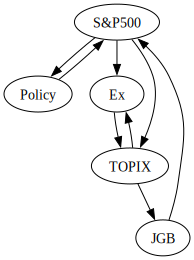

In [64]:
#
# 有向グラフ（VARのみ考慮）
#
    
# インスタンスの生成
graph3 = Digraph()

# グラフにノードを追加
for i in range(len(df2.columns)):
    graph3.node(df2.columns[i])

# 因果を検定し有意なとき線を引く
for i in range(len(df2.columns)):
    for j in range(len(df2.columns)):
        if i != j :
            #因果の検定
            test_c_COVID = results_COVID.test_causality(causing=i, caused=j) 
            #p値が0.1未満のとき線を追加
            if test_c_COVID.pvalue < 0.05:
                graph3.edge(df2.columns[i], df2.columns[j])

# 有向グラフを表示
graph3

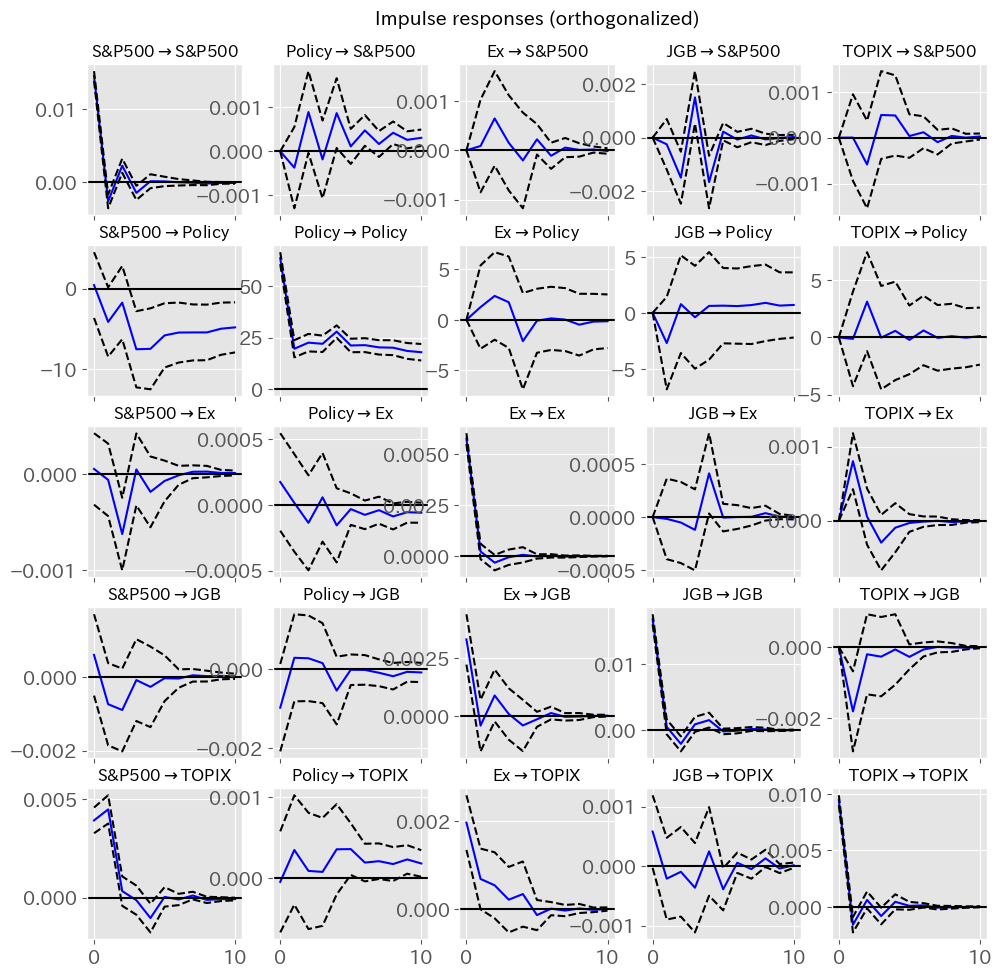

In [65]:
#インパルス応答関数
    
irf_COVID = results_COVID.irf()
irf_COVID.plot(orth=True)
plt.show()

In [66]:
fevd_COVID = results_COVID.fevd(11)
fevd_COVID.summary()

FEVD for S&P500
        S&P500    Policy        Ex       JGB     TOPIX
0     1.000000  0.000000  0.000000  0.000000  0.000000
1     0.999041  0.000639  0.000035  0.000284  0.000000
2     0.982255  0.004168  0.001890  0.010176  0.001511
3     0.971471  0.004231  0.001952  0.019798  0.002548
4     0.955776  0.007402  0.002101  0.031206  0.003515
5     0.955315  0.007452  0.002312  0.031403  0.003519
6     0.954261  0.008413  0.002362  0.031389  0.003575
7     0.954072  0.008529  0.002375  0.031410  0.003614
8     0.953328  0.009282  0.002373  0.031400  0.003617
9     0.953049  0.009571  0.002373  0.031390  0.003616
10    0.952660  0.009971  0.002373  0.031379  0.003618

FEVD for Policy
        S&P500    Policy        Ex       JGB     TOPIX
0     0.000052  0.999948  0.000000  0.000000  0.000000
1     0.003894  0.994099  0.000356  0.001647  0.000004
2     0.004078  0.990912  0.001443  0.001593  0.001974
3     0.013977  0.980932  0.001848  0.001464  0.001779
4     0.020938  0.973828  0.0023

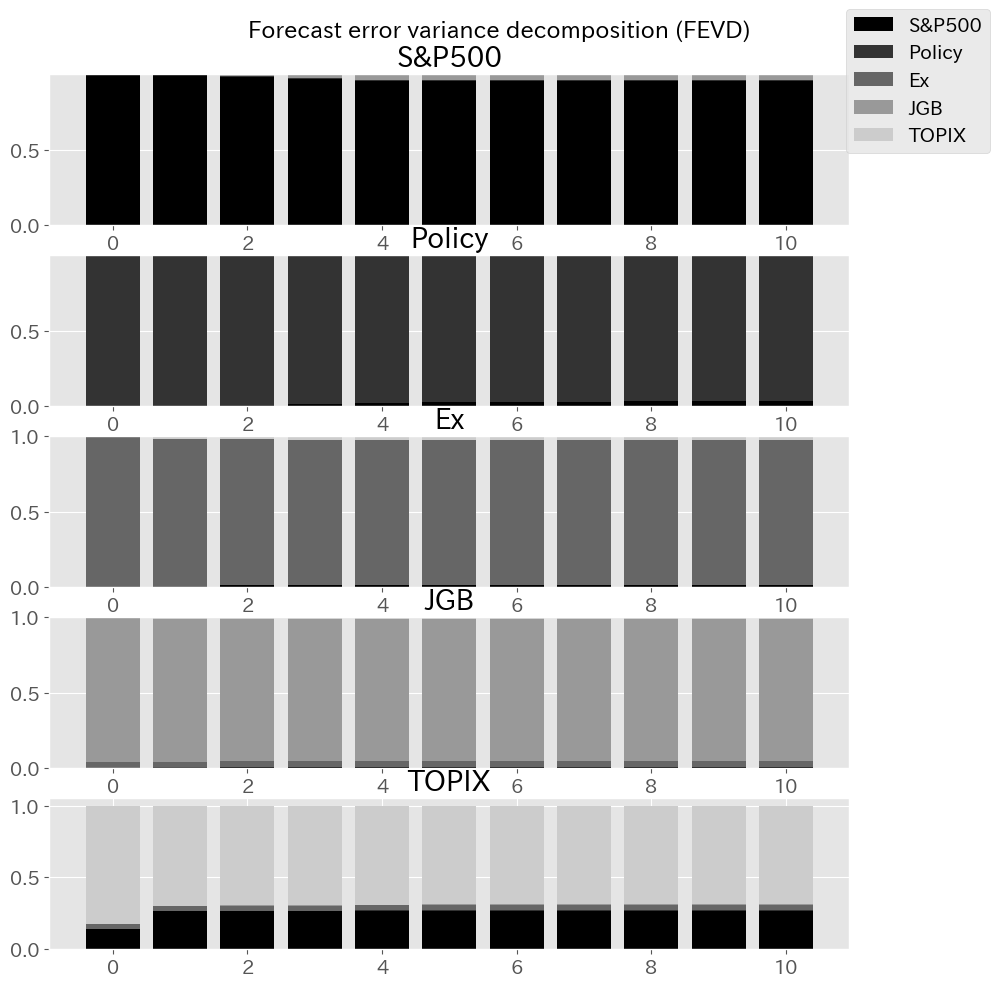

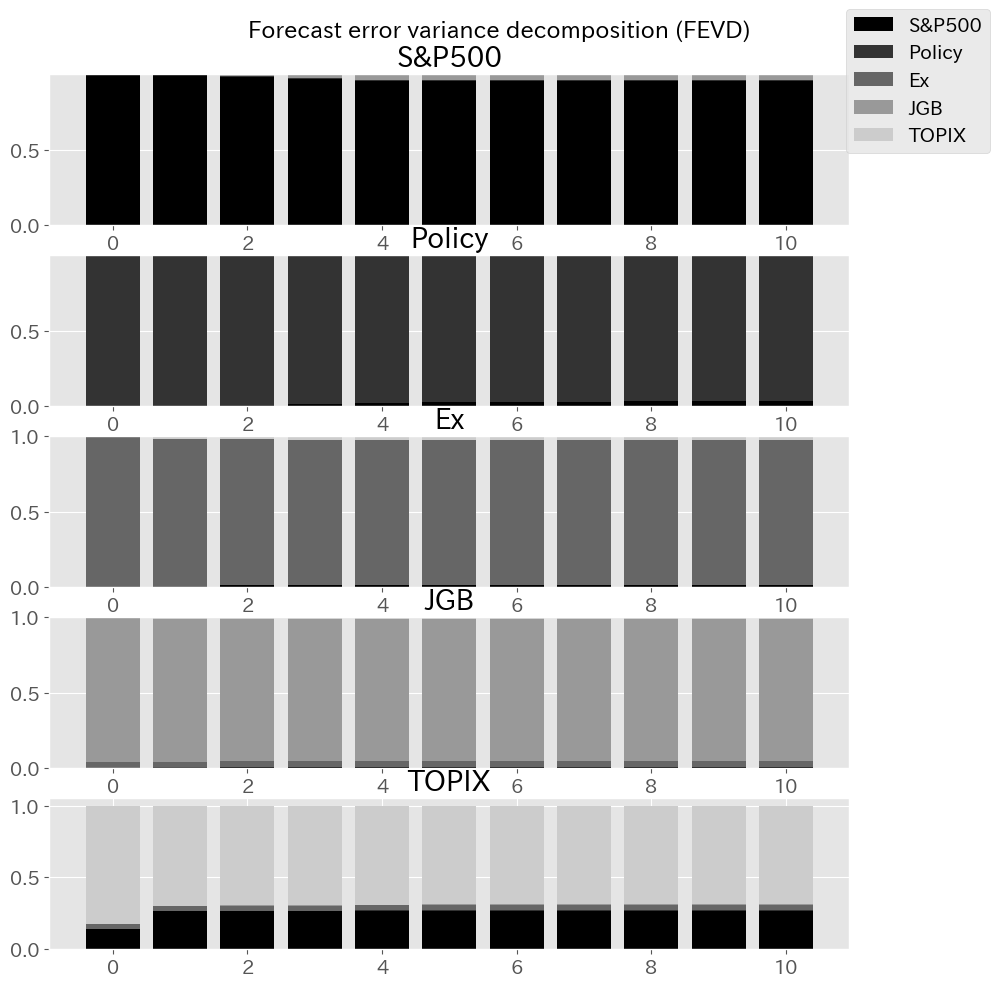

In [67]:
fevd_COVID.plot()